# Sistemas Inteligentes

## Exercício Computacional 1 - Classificação

Neste laboratório serão explorados os classificadores **KNN** e **Decision Tree**. Também vamos explorar a métrica de **Acurácia** e conhecer a **Confusion Matrix**.

### Identificação do Aluno

#### Nome Completo

Matheus Prudencio dos Santos

#### RA

11114014

### Importação e preparação dos dados

Importe o pacote **datasets** da biblioteca **sklearn**, então carregue o dataset de imagens de dígitos, utilizando a função **load_digits()** do pacote de datasets importado, já atribuindo-o à variável **digits_dataset**.

In [1]:
from sklearn import datasets

digits_sataset = datasets.load_digits()

Tendo feito o processo adequadamente, a variável **digits_dataset** conterá todo o dataset correspondente, inclusive com informações que não são de nosso interesse para esta atividade. Para selecionar apenas o que é de nosso interesse, atribua à variável **digits_img** apenas o objeto **images** de **digits_dataset**.

In [2]:
digits_img = digits_sataset.images

Verifique o formato de **digits_img**.

In [3]:
type(digits_img)

numpy.ndarray

Imprima **digits_img** para que seja possível ver como são os dados que temos no momento.

In [4]:
print(digits_img)

[[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0. 16. ... 15.  0.  0.]
  [ 0.  0. 15. ... 16.  0.  0.]
  [ 0.  0.  2. ...  6.  0.  0.]]

 [[ 0.  0.  2. ...  0.  0.  0.]
  [ 0.  0. 14. ... 15.  1.  0.]
  [ 0.  4. 16. ... 16.  7.  0.]
  ...
  [ 0.  0.  0. ... 16.  2.  0.]
  [ 0.  0.  4. ... 16.  2.  0.]
  [ 0.  0.  5. ... 12.  0.  

Sabendo que esta estrutura se refere a um conjunto de imagens, pode ser interessante imprimir ao menos uma ou duas para visualizarmos como é o seu padrão.

Para fazer isso, importe o pacote de funções **pyplot** da biblioteca **matplotlib**. Apesar de não ser obrigatório, para facilitar, recomenda-se utilizar um "apelido" para esse tipo de pacote com nome tão grande, a fim de tornar o seu uso mais prático. É comum utilizar o termo "plt" para o pyplot, mas você pode chamar como preferir.

In [5]:
for x in range(2):
    print(digits_img[x])
    print()

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]

[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]



Depois de importar o pacote, utilize a função **imshow()** do **pyplot** para imprimir na tela uma das imagens contidas em **digits_img**.

Obs: caso tenha sido utilizado um apelido na importação do pacote, lembre-se dele quando for chamar suas funções, como é o caso agora.

In [6]:
import matplotlib.pyplot as plt


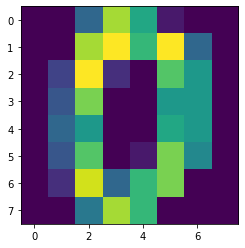

In [7]:
plt.imshow(digits_img[0])

Apesar de esse tipo de formato permitir que essas imagens sejam elegantemente exibidas a nós, humanos, não se trata de um formato tão interessante para se efetuar processamentos computacionais. Por isso, faça uma mudança no formato da estrutura utilizando a função **reshape()** da biblioteca **numpy**. Como tal biblioteca ainda não for importada, comece por sua importação, preferencialmente utilizando o apelido "np" para tornar mais prática a sua utilização.

In [8]:
import numpy as np

np.shape(digits_img)

(1797, 8, 8)

Agora, com a biblioteca já importada, utilize a função **reshape()** para forçar um formato unidimensional para cada imagem dentro da matriz original.

Note que o número de imagens não pode ser alterado, tampouco as imagens em si; apenas o formato da representação de cada uma dessas imagens pode sofrer alteração.

In [9]:
digts = digits_img.reshape(1797,8*8)


Agora verifique se o novo formato está como desejava-se obter. Se o novo formato for bidimensional, o número de imagens for o mesmo que o original e o número de pixels for o mesmo que o original, então está correto.

(1797, 64)


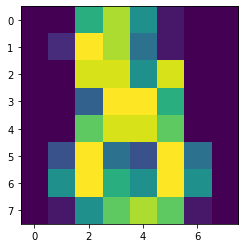

In [10]:
print(digts.shape)

plt.imshow(digits_img[1796])


Agora que já temos os dados de entrada adequadamente preparados, precisamos dos dados de saída correspondentes. Então, atribua o objeto **target** de **digits_dataset** à variável **digits_target**.

In [11]:
digits_target = digits_sataset.target

Imprima **digits_target** para visualizar como são esses dados

In [12]:
print(digits_target)

[0 1 2 ... 8 9 8]


Agora imprima o formato de **digits_target** para saber exatamente as suas dimensões.

In [13]:
print(digits_target.shape)

(1797,)


#### Divisão dos dados em grupos para treinamento e teste.

Importe a função **train_test_split()** do pacote **model_selection**, pertencente à biblioteca **sklearn**.

In [14]:
from sklearn.model_selection import train_test_split

Agora, utilizando a função **train_test_split()**, divida os dados de entrada e saída, **digits** e **digits_target**, respectivamente, separando-os em dados de treinamento e de testes para entrada e saída, ou seja, **x_train**, **x_test**, **y_train** e **y_test**.

Separe 25% para testes utilizando o argumento *test_size* da própria função **train_test_split()**.

In [15]:
digits_treinamento, digits_teste, target_treinamento, target_teste = train_test_split(digts, digits_target, test_size=0.25, random_state=0)

Imprima, em diferentes células, o formato de cada uma das partes obtidas.

In [16]:
digits_treinamento.shape

(1347, 64)

In [17]:
digits_teste.shape

(450, 64)

In [18]:
target_treinamento.shape

(1347,)

In [19]:
 target_teste.shape

(450,)

### K-Nearest Neighbors (KNN)

#### Treinamento

Importe o classificador do KNN, que é uma função chamada **KNeighborsClassifier** do pacote **neighbors**, que faz parte da biblioteca **sklearn**.

In [20]:
from sklearn.neighbors import KNeighborsClassifier

Agora crie o classificador com o nome **knn** utilizando para o argumento *n_neighbors* da função **KNeighborsClassifier** o número de vizinhos próximos que serão considerados pelo algoritmo. Lembre-se de preferir um número ímpar não muito grande.

In [21]:
knn = KNeighborsClassifier(n_neighbors=5)

Treine o classificador **knn** por meio de sua própria função **fit()**, atribuindo o resultado ao próprio **knn**. Os argumentos da função **fit()** são os dados de entrada e saída de treinamento, ou seja, **x_train** e **y_train**.

In [22]:
knn.fit(digits_treinamento, target_treinamento)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

#### Classificação

Então, faça a classificação (também chamada de predição), utilizando a função **predict()** do próprio classificador **knn**. O argumento da função é apenas a entrada de teste, ou seja, **x_test**. Atribua a saída dessa classificação à variável **y_pred**.

In [23]:
classificacao = knn.predict(digits_teste)

#### Resultados

Para analisar os resultados, precisamos utilizar algumas ferramentas e métricas. A biblioteca **sklearn** possui um grande conjunto de funções para essa finalidade em seu pacote **metrics**. Importe as funções **accuracy_score** e **confusion_matrix**.

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix

Comece utilizando a função **accuracy_score** para calcular a acurácia do classificador. Esta é uma das mais comuns métricas para se verificar o desempenho do classificador. O primeiro argumento da função é o conjunto de saídas esperadas, ou seja, **y_test**; o segundo, o conjunto de saídas obtidas pela predição do classificador utilizado, ou seja, **y_pred**.

In [25]:
resultados = accuracy_score(target_teste, classificacao)

print(resultados)

0.98


Gere a matriz de confusão utilizando a função **confusion_matrix**.

In [26]:
matriz = confusion_matrix(target_teste, classificacao)

matriz

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 43,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 45,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 47,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 52,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 48,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  1,  1, 44,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 46]], dtype=int64)

### Decision Tree

#### Treinamento

In [27]:
from sklearn.tree import DecisionTreeClassifier

Assim como foi feito com o KNN, crie um classificador de Decision Tree chamado **dt** utilizando agora a função **DecisionTreeClassifier**.

In [28]:
dt = DecisionTreeClassifier(criterion="entropy")

Treine classificador **dt** utilizando a função **fit** com os dados de treinamento, **x_train** e **y_train**, respectivamente.

In [29]:
dt.fit(digits_treinamento, target_treinamento)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### Classificação

Faça a classificação dos dados de entrada para testes, **x_test**, utilizando a função **predict** do próprio **dt** e armazene os resultados em **y_pred**.

In [30]:
Classificacao = dt.predict(digits_teste)

Classificacao

array([2, 1, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 8, 7,
       9, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 1, 1, 3, 3, 6, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 2, 5, 1, 2, 8, 2, 0, 9, 7, 2, 2, 6, 0, 5, 3, 7, 5,
       1, 2, 5, 9, 3, 1, 7, 7, 4, 8, 5, 3, 5, 4, 2, 5, 2, 0, 5, 1, 4, 4,
       1, 4, 8, 9, 7, 9, 8, 0, 1, 5, 2, 5, 8, 4, 1, 7, 0, 6, 1, 5, 5, 1,
       9, 5, 9, 9, 5, 3, 5, 6, 2, 8, 6, 2, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 2, 9, 7, 7, 6, 7, 6, 1, 6, 0, 2, 1, 9, 5, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 9, 6, 2, 0, 3, 3, 3, 0, 7, 7, 1, 7, 8, 0, 3, 8, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 9, 3, 1, 4, 3, 1, 6, 8, 9,
       9, 4, 9, 3, 7, 6, 1, 3, 3, 1, 6, 9, 3, 6, 3, 2, 2, 0, 7, 3, 1, 1,
       9, 7, 2, 7, 8, 2, 5, 7, 5, 3, 9, 7, 2, 7, 5, 5, 7, 0, 3, 1, 6, 1,
       9, 8, 4, 3, 3, 0, 3, 6, 4, 6, 3, 1, 6, 8, 2, 8, 4, 6, 7, 5, 8, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 8, 9, 0,

#### Resultados

Verifique a acurácia do classificador **dt** por meio da função **accuracy_score**.

In [31]:
resultado = accuracy_score(target_teste, Classificacao)

resultado

0.8355555555555556

Mostre a matriz de confusão do classificador **dt** utilizando a função **confusion_matrix**.

In [32]:
matriz = confusion_matrix(target_teste,Classificacao)

matriz

array([[35,  0,  0,  0,  0,  1,  1,  0,  0,  0],
       [ 0, 41,  0,  0,  0,  0,  1,  0,  0,  1],
       [ 2,  2, 31,  5,  0,  0,  0,  0,  3,  1],
       [ 0,  1,  3, 36,  0,  1,  0,  0,  1,  3],
       [ 0,  0,  0,  0, 34,  0,  0,  3,  0,  1],
       [ 0,  5,  1,  0,  2, 39,  0,  0,  0,  1],
       [ 0,  1,  0,  2,  0,  1, 48,  0,  0,  0],
       [ 0,  0,  0,  2,  1,  1,  0, 42,  2,  0],
       [ 0,  3,  4,  2,  1,  2,  0,  1, 34,  1],
       [ 1,  2,  2,  3,  0,  2,  0,  0,  1, 36]], dtype=int64)

In [33]:
   y = 0;
for x in target_teste:
    if x == 2:
        y = y +1

y

44

## Questões

### 1. O que você entende por "acurácia"? Esta métrica é suficiente para avaliar o desempenho de um classificador? Se não, o que mais poderia ser utilizado? E por que?

A acurácia nos diz quanto o classificador está certo, ou seja, quantas classificaçoes estão corretas em relação ao total de classificações feitas. Ela não é suficiente pois ela me diz se estou acertando muito ou errando e muitas vezes estamos buscando um resultado ótimo em determinada classificação. Exemplo : estou classificando pessoas com determinada doença em uma base onde de cada 100 pessoas 1 tem a doença, se o classificador der como resultado que todas as pessoas são saudáveis a acurácia sera de 0.99 mas o modelo sera horrivel pois ele não me diz nada sobre o meu problema. Para atender essa demanda existem as métricas como precisão, recall,sensibilidade, especifidade... No problema usado como exemplo a sensibilidade poderia ser usada como metrica, pois ela mede a proporçõa de casos positivos que foram classificados corretamente

### 2. Que tipo de informação a matriz de confusão oferece sobre o classificador?

A matriz de confusão nos oferece a frequencia de como está sendo feita a classificação, com ela conseguimos saber desde a  frequência com que um 9 é classificado incorretamente como um 8 até frequencia com que ele é classificado corretamente.

### 3. O que representa cada linha dessa matriz? E cada coluna? E a diagonal principal?

Cada linha representa uma classe e cada coluna representa como essa classe foi classificada pelo modelo, assim a diagonal mostra onde o modelo classificou corretamente.

Exemplo matriz de confusão usada no modelo Decision Tree mas agora com labels:
    
                 0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 
                --------------------------------------- 
              0 |35,  0,  0,  0,  1,  1,  0,  0,  0,  0
              1 | 0, 40,  0,  0,  0,  0,  2,  1,  0,  0
              2 | 0,  2, 30,  5,  0,  0,  0,  0,  4,  3
              3 | 0,  1,  1, 35,  0,  2,  0,  0,  2,  4
              4 | 0,  0,  0,  0, 34,  0,  1,  2,  1,  0
              5 | 0,  4,  0,  0,  2, 41,  0,  0,  0,  1
              6 | 0,  1,  0,  0,  0,  0, 51,  0,  0,  0
              7 | 0,  0,  0,  2,  2,  0,  0, 42,  2,  0
              8 | 1,  4,  3,  2,  1,  2,  0,  1, 32,  2
              9 | 1,  2,  2,  4,  0,  3,  0,  1,  1, 33


### 4. Seria possível avaliar, ainda que superficialmente, o desempenho de um classificador se utilizássemos apenas pixels em escala de cinza para representar os valores de uma matriz de confusão? Por que?

Sim, uma forte concentração na diagonal principal demonstraria que o modelo está correto e a existencia de pontos cinza fora dessa diagonal demostrariam que o modelo está sofrendo, possivelmente, overfitting e precisa de ajustes.

### 5. Quais critérios você utilizaria para escolher o número de vizinhos do algoritmo KNN? Por que? E como isso pode influenciar no desempenho do algoritmo?

O numero deve ser impar, não pode ser muito pequeno, pois numeros pequenos são muito sensiveis a ruidos, e não pode ser muito grande, pois aumentaria a chance de possuir um alto enviesamento. Computacionalmente Um numero alto de K iria demandar maiores recursos computacionais.


### 6. Algum dos dois classificadores explorados neste laboratório é não paramétrico? Se sim, o que o permite fazer tal afirmação?

Ambos os classificadores são não parametricos porque ser paramétrico parte da premissa de que as classes dos objetos no espaço de classificação seguem uma distribuição conhecida, no KNN os objetos estão disperços entre si e na DT não possuimos espaço observavel.

### 7. Qual dos dois classificadores se saiu melhor neste laboratório? Por que? Caso fossem utilizados estes mesmos classificadores para classificar digitos de outra base de dados, o classificador com melhor desempenho ainda seria necessariamente o mesmo? Por que?

O KNN se saiu melhor, como a base tem um numero pequeno de dados e a imagem tem o tamanho de 64 bytes o KNN se adaptou melhor. Mas isso não verdade absoluta, se aplicarmos estes 2 classificadores a uma base de dados maior ou a digitos com mais bytes (128 por exemplo ) a Decision Tree poderia alcançar uma acurácia maior.   

## Referências

[Scikit-Learn - Datasets](http://scikit-learn.org/stable/datasets/index.html)

[Matplotlib - Pyplot](https://matplotlib.org/api/pyplot_summary.html)

[Numpy](https://docs.scipy.org/doc/numpy/reference/)

[Scikit-Learn - Train, Test and Split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

[Scikit-Learn - KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

[Scikit-Learn - DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

[Scikit-Learn - Accuracy Score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

[Scikit-Learn - Confusion Matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)